<a href="https://colab.research.google.com/github/Guidong99/Project-of-Data-Science/blob/main/833hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from math import sqrt
import pandas as pd
from numpy import dot
from numpy import transpose as t
from matplotlib import pyplot as plt
from scipy import integrate
from math import exp
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr


#Question 1

##1-a


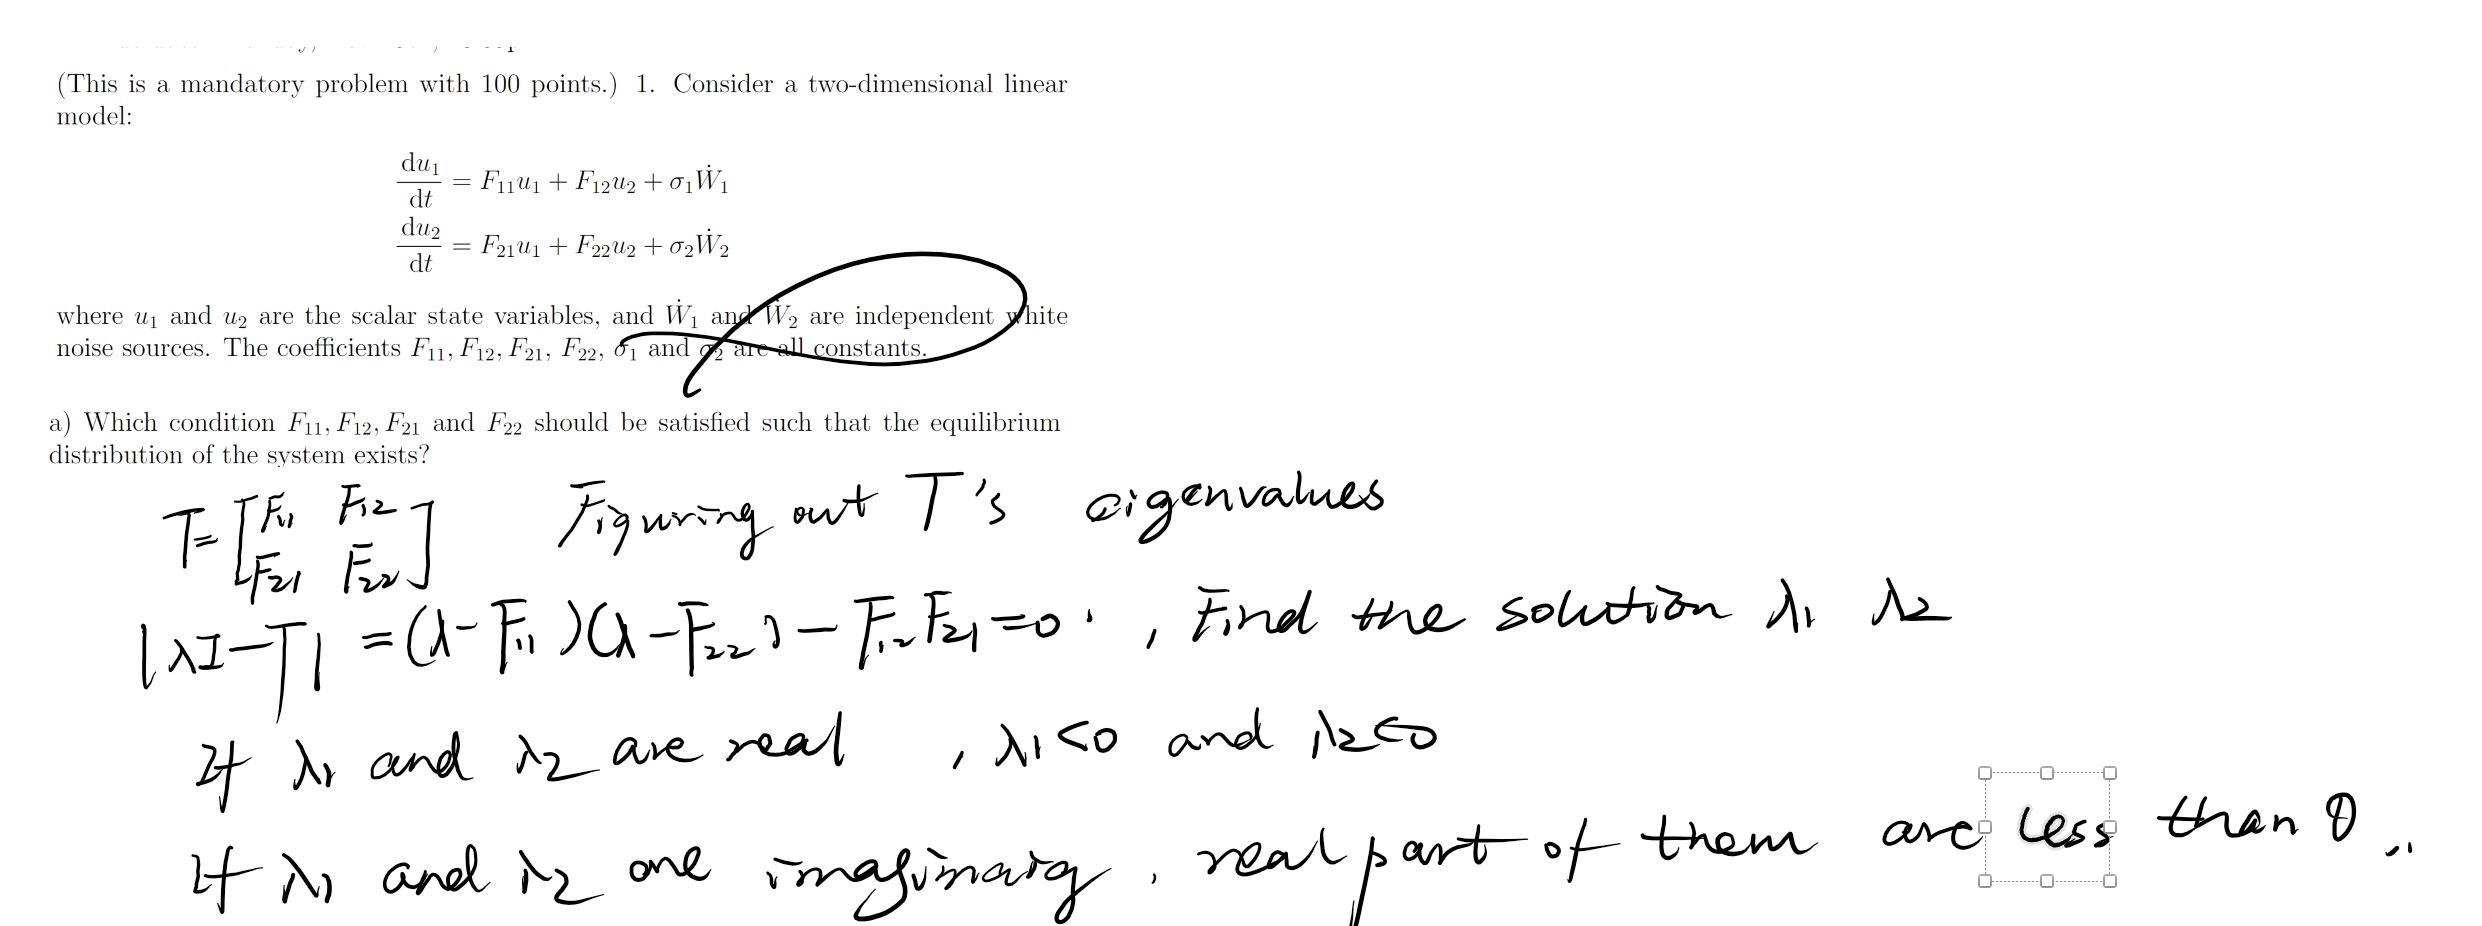

##1-b

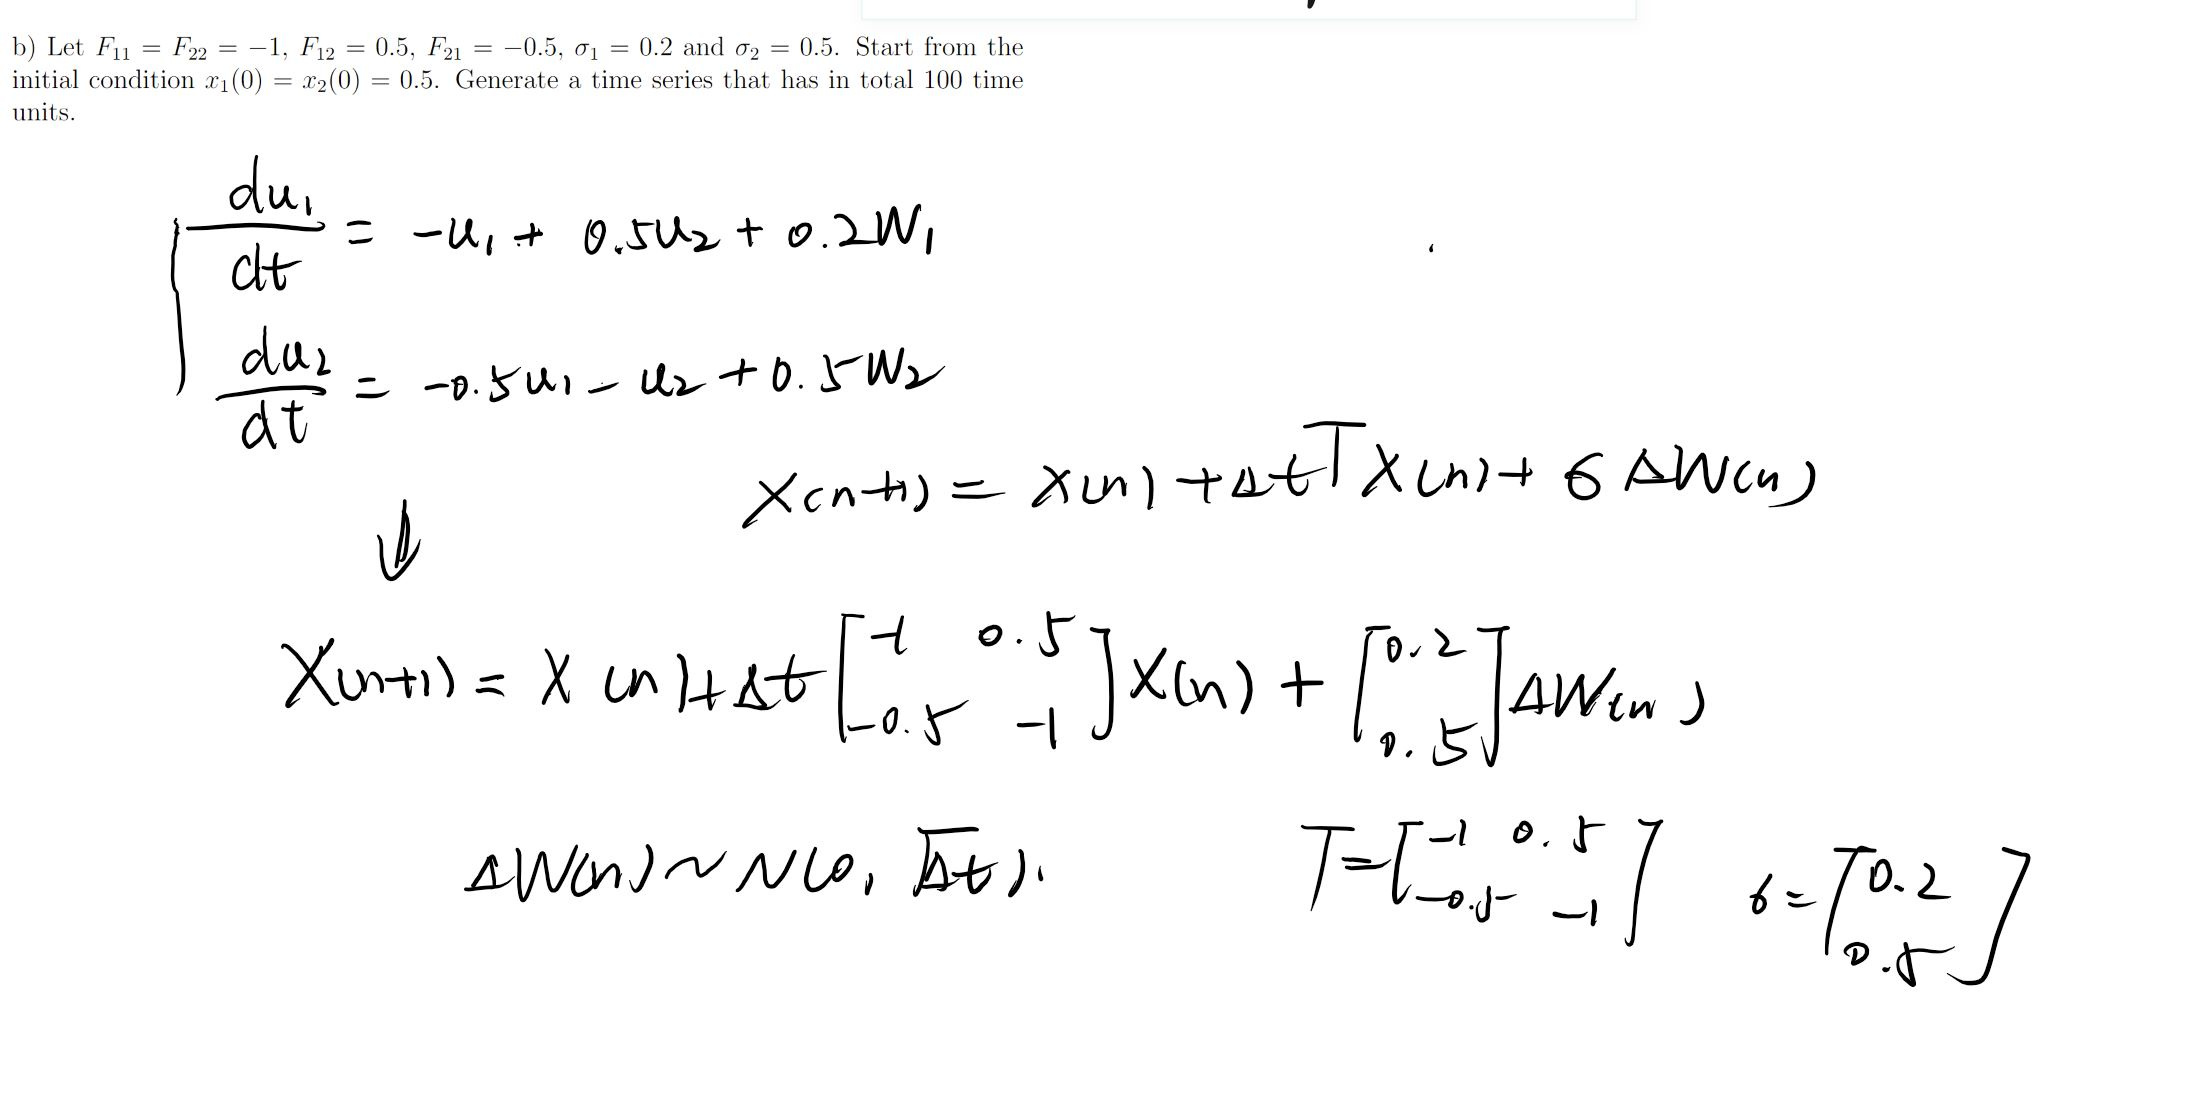

Text(0.5, 0, 'time')

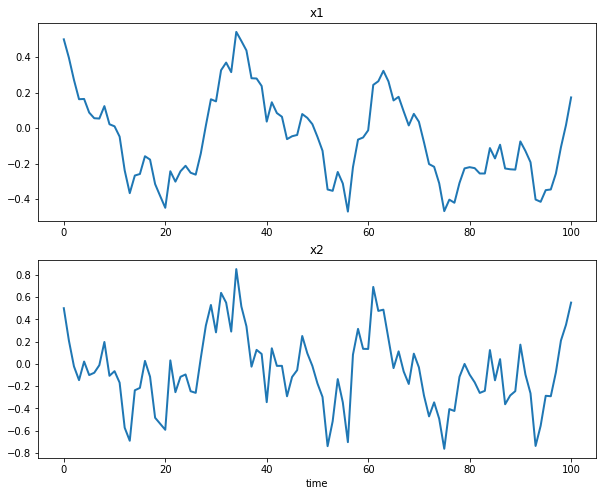

In [ ]:
x=[0.5,0.5]
u=[x]
T=[[-1,0.5],[-0.5,-1]]
sigma=[0.2,0.5]
dt=0.25
time=list(range(100))
for i in time:
  x=u[-1]
  dw=np.random.normal(0,sqrt(dt),1)
  u.append(list(x+dt*dot(T,x)+dw*sigma))
x1,x2=[],[]
for i in range(len(u)):
  x1.append(u[i][0])
  x2.append(u[i][1])


fig=plt.figure(figsize=(10,8))
ax1,ax2=plt.subplot(2,1,1),plt.subplot(2,1,2)
ax1.plot(x1,lw=2)
ax2.plot(x2,lw=2)
ax1.set_title('x1')
ax2.set_title('x2')
plt.xlabel('time')


##1-c

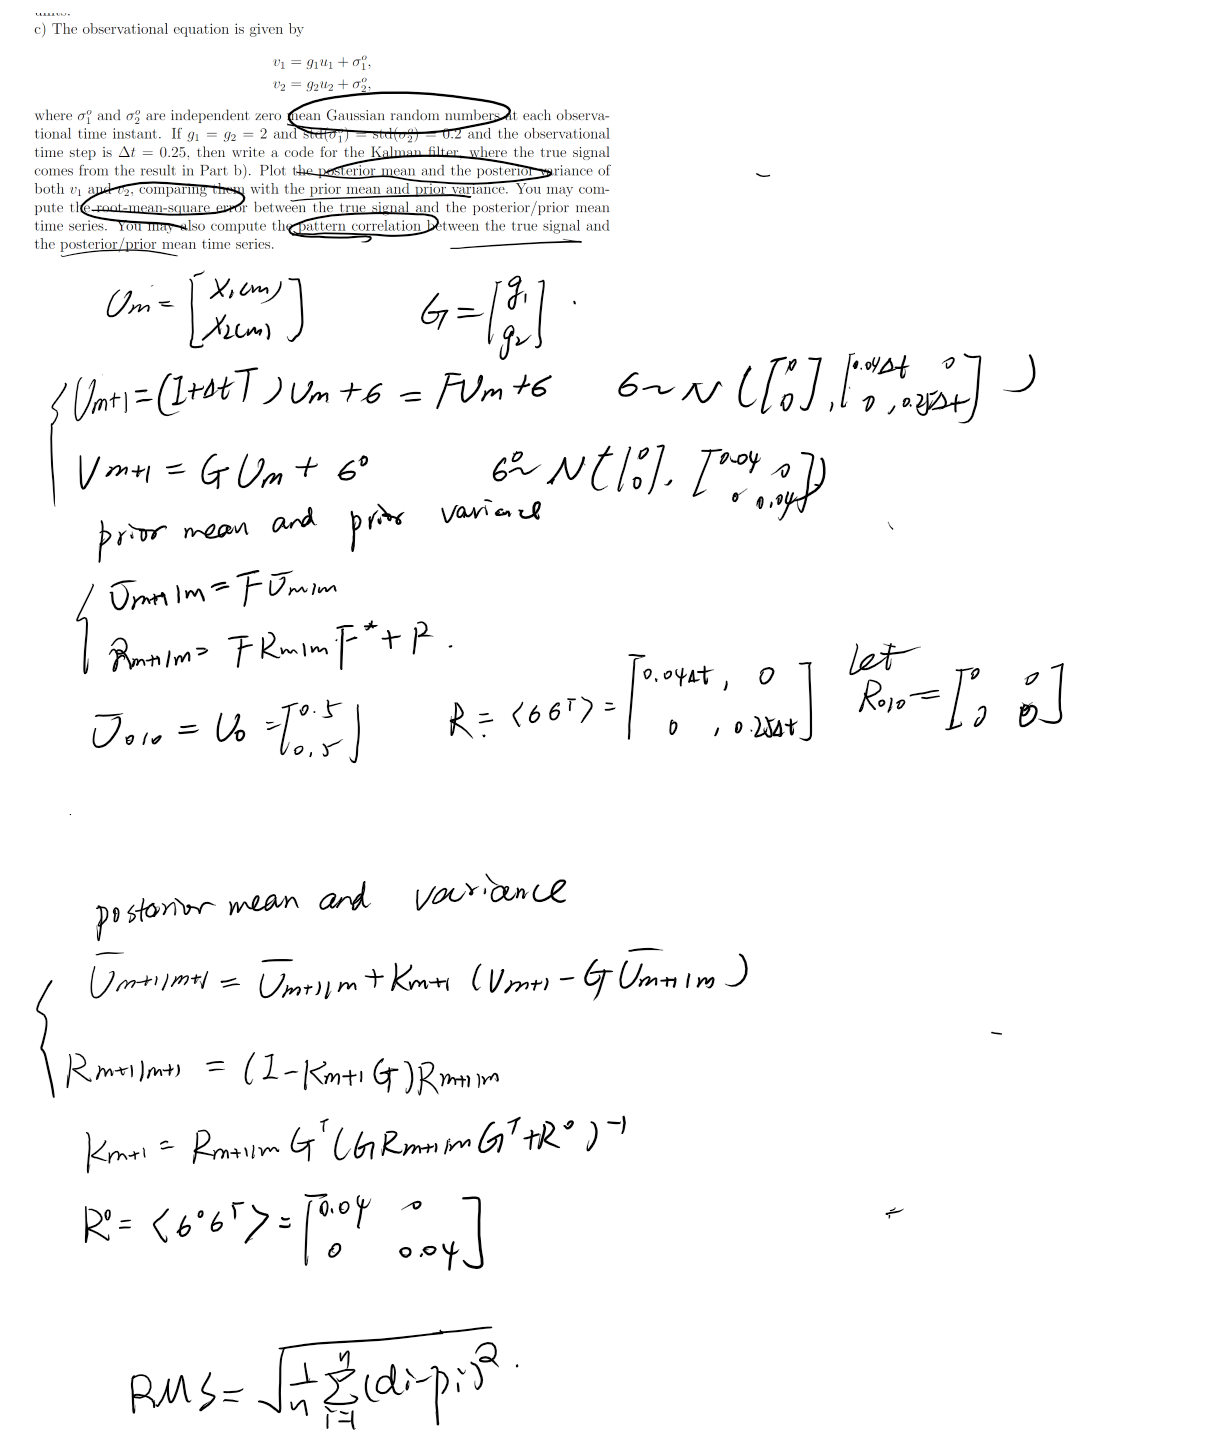

In [ ]:
dt=0.25
T=np.array([[-1,0.5],[-0.5,-1]])
F=np.identity(2)+dt*T
U=[np.array([0.5,0.5])]
R=[np.array([[0,0],[0,0]])]
# sigma0=np.random.multivariate_normal([0,0],[[0.04,0],[0,0.4]])
G=np.array([[2,0],[0,2]])
U0=[np.array([0.5,0.5])]
U1,R1=[np.array([0.5,0.5])],[[[0,0],[0,0]]]
for i in range(100):
  u=U[-1]
  u0=U0[-1]
  r=R[-1]
  np.random.seed()
  sigma=np.random.multivariate_normal([0,0],[[0.04*dt,0],[0,0.25*dt]])
  u0=F@u0+sigma
  u1=F@u
  r1=F@r@t(F)+[[0.04*dt,0],[0,0.25*dt]]
  v=G@u+np.random.multivariate_normal([0,0],[[0.04,0],[0,0.04]])
  k=r1@t(G)@np.linalg.inv(G@r1@t(G)+[[0.04,0],[0,0.04]])
  u=u1+k@(v-G@u1)
  r=(np.identity(2)-k@G)@r1
  U1.append(u1)
  R1.append(r1)
  U.append(u)
  R.append(r)
  U0.append(u0)


def get_mean(lt,ind):
  s=[]
  for i in range(len(lt)):
    s.append(lt[i][ind])
  return s

def get_var(lt,ind):
  s=[]
  for i in range(len(lt)):
    s.append(lt[i][ind][ind])
  return s

def get_rms(lt1,lt2):
  return sqrt(np.array((lt1-lt2)**2).mean())


x1=pd.DataFrame()
x1['true_signal']=get_mean(U0,0)
x1['posterior_mean']=get_mean(U,0)
x1['posterior_var']=get_var(R,0)
x1['prior_mean']=get_mean(U1,0)
x1['prior_var']=get_var(R1,0)



x2=pd.DataFrame()
x2['true_signal']=get_mean(U0,1)
x2['posterior_mean']=get_mean(U,1)
x2['posterior_var']=get_var(R,1)
x2['prior_mean']=get_mean(U1,1)
x2['prior_var']=get_var(R1,1)

# x3=x1.copy()
# x4=x2.copy()

###figure of x1 and x2

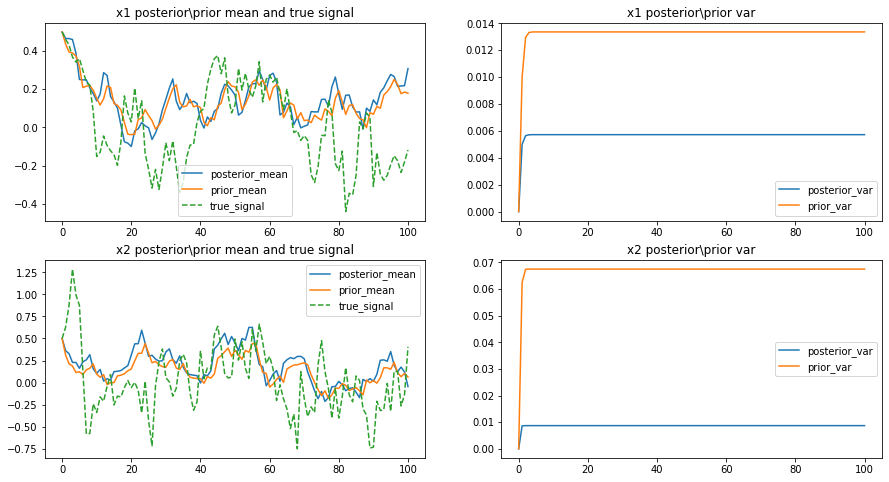

In [ ]:
fig=plt.figure(figsize=(15 ,8))
ax1,ax2,ax3,ax4=plt.subplot(2,2,1),plt.subplot(2,2,2),plt.subplot(2,2,3),plt.subplot(2,2,4)
ax1.plot(x1['posterior_mean'],label='posterior_mean')
ax1.plot(x1['prior_mean'],label='prior_mean')
ax1.plot(x1['true_signal'],label='true_signal',linestyle='--')
ax2.plot(x1['posterior_var'],label='posterior_var')
ax2.plot(x1['prior_var'],label='prior_var')


ax3.plot(x2['posterior_mean'],label='posterior_mean')
ax3.plot(x2['prior_mean'],label='prior_mean')
ax3.plot(x2['true_signal'],label='true_signal',linestyle='--')
ax4.plot(x2['posterior_var'],label='posterior_var')
ax4.plot(x2['prior_var'],label='prior_var')

ax1.set_title('x1 posterior\prior mean and true signal')
ax3.set_title('x2 posterior\prior mean and true signal')
ax2.set_title('x1 posterior\prior var')
ax4.set_title('x2 posterior\prior var')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

### Root Mean Square

In [ ]:
x1_rms_1=get_rms(x1['true_signal'],x1['posterior_mean'])
x1_rms_2=get_rms(x1['true_signal'],x1['prior_mean'])


x2_rms_1=get_rms(x2['true_signal'],x2['posterior_mean'])
x2_rms_2=get_rms(x2['true_signal'],x2['prior_mean'])

x1_rms_1,x1_rms_2,x2_rms_1,x2_rms_2

# x1_pc_1=np.corrcoef(x1['true_signal'],x1['posterior_mean'])
# x1_pc_2=np.corrcoef(x1['true_signal'],x1['prior_mean'])

# x2_pc_1=np.corrcoef(x2['true_signal'],x2['posterior_mean'])
# x2_pc_2=np.corrcoef(x2['true_signal'],x2['prior_mean'])

# x1_pc_1,x1_pc_2,x2_pc_1,x2_pc_2

(0.2547803443663725,
 0.23927612760218614,
 0.4279817682792544,
 0.3884516509942223)

In [ ]:
from tabulate import tabulate
d = [ ["x1",x1_rms_1 , x1_rms_2],
     ["x2", x2_rms_1, x2_rms_2],]

print(tabulate(d, headers=["values", "posterior&true RMS", "prior&true RMS"]))

values      posterior&true RMS    prior&true RMS
--------  --------------------  ----------------
x1                    0.25478           0.239276
x2                    0.427982          0.388452


##1-d&1-c

### Conclusion
The changing of g2 also changes observation of U2, it becomes a pure noise instead of a sum of posteror mean and noise. So it makes the fitting worse.

The changing of F changes the realtionship between x1 and x2, they become similar.

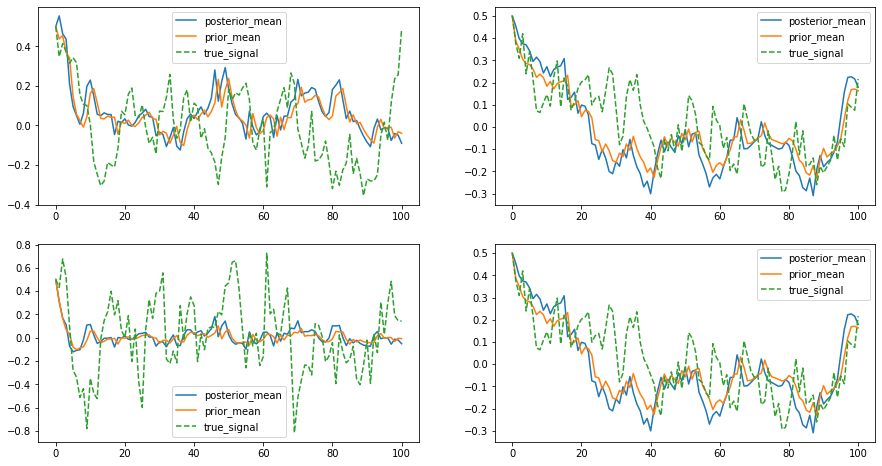

In [ ]:
dt=0.25
# T=np.array([[-1,0.5],[-0.5,-1]])
T=np.array([[-1,0.1],[-0.1,-1]])
F=np.identity(2)+dt*T
U=[np.array([0.5,0.5])]
R=[np.array([[0,0],[0,0]])]
# sigma0=np.random.multivariate_normal([0,0],[[0.04,0],[0,0.4]])
G=np.array([[2,0],[0,0]])
U0=[np.array([0.5,0.5])]
U1,R1=[np.array([0.5,0.5])],[[[0,0],[0,0]]]
for i in range(100):
  u=U[-1]
  u0=U0[-1]
  r=R[-1]
  np.random.seed()
  sigma=np.random.multivariate_normal([0,0],[[0.04*dt,0],[0,0.25*dt]])
  u0=F@u0+sigma
  u1=F@u
  r1=F@r@t(F)+[[0.04*dt,0],[0,0.25*dt]]
  v=G@u+np.random.multivariate_normal([0,0],[[0.04,0],[0,0.04]])
  k=r1@t(G)@np.linalg.inv(G@r1@t(G)+[[0.04,0],[0,0.04]])
  u=u1+k@(v-G@u1)
  r=(np.identity(2)-k@G)@r1
  U1.append(u1)
  R1.append(r1)
  U.append(u)
  R.append(r)
  U0.append(u0)


def get_mean(lt,ind):
  s=[]
  for i in range(len(lt)):
    s.append(lt[i][ind])
  return s

def get_var(lt,ind):
  s=[]
  for i in range(len(lt)):
    s.append(lt[i][ind][ind])
  return s

def get_rms(lt1,lt2):
  return sqrt(np.array((lt1-lt2)**2).mean())
  x1=pd.DataFrame()
# x1['true_signal']=get_mean(U0,0)
# x1['posterior_mean']=get_mean(U,0)
# x1['posterior_var']=get_var(R,0)
# x1['prior_mean']=get_mean(U1,0)
# x1['prior_var']=get_var(R1,0)



# x2=pd.DataFrame()
# x2['true_signal']=get_mean(U0,1)
# x2['posterior_mean']=get_mean(U,1)
# x2['posterior_var']=get_var(R,1)
# x2['prior_mean']=get_mean(U1,1)
# x2['prior_var']=get_var(R1,1)



x3=pd.DataFrame()
x3['true_signal']=get_mean(U0,0)
x3['posterior_mean']=get_mean(U,0)
x3['posterior_var']=get_var(R,0)
x3['prior_mean']=get_mean(U1,0)
x3['prior_var']=get_var(R1,0)



x4=pd.DataFrame()
x4['true_signal']=get_mean(U0,1)
x4['posterior_mean']=get_mean(U,1)
x4['posterior_var']=get_var(R,1)
x4['prior_mean']=get_mean(U1,1)
x4['prior_var']=get_var(R1,1)


fig=plt.figure(figsize=(15,8))
ax1,ax2,ax3,ax4=plt.subplot(2,2,1),plt.subplot(2,2,2),plt.subplot(2,2,3),plt.subplot(2,2,4)


ax1.plot(x1['posterior_mean'],label='posterior_mean')
ax1.plot(x1['prior_mean'],label='prior_mean')
ax1.plot(x1['true_signal'],label='true_signal',linestyle='--')


ax3.plot(x2['posterior_mean'],label='posterior_mean')
ax3.plot(x2['prior_mean'],label='prior_mean')
ax3.plot(x2['true_signal'],label='true_signal',linestyle='--')


ax2.plot(x3['posterior_mean'],label='posterior_mean')
ax2.plot(x3['prior_mean'],label='prior_mean')
ax2.plot(x3['true_signal'],label='true_signal',linestyle='--')


ax4.plot(x3['posterior_mean'],label='posterior_mean')
ax4.plot(x3['prior_mean'],label='prior_mean')
ax4.plot(x3['true_signal'],label='true_signal',linestyle='--')


# ax1.set_title('x1 posterior\prior mean and true signal')
# ax3.set_title('x2 posterior\prior mean and true signal')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

# ax4.plot(x1['true_signal'],x2['true_signal'])



#Question 2

##2-a

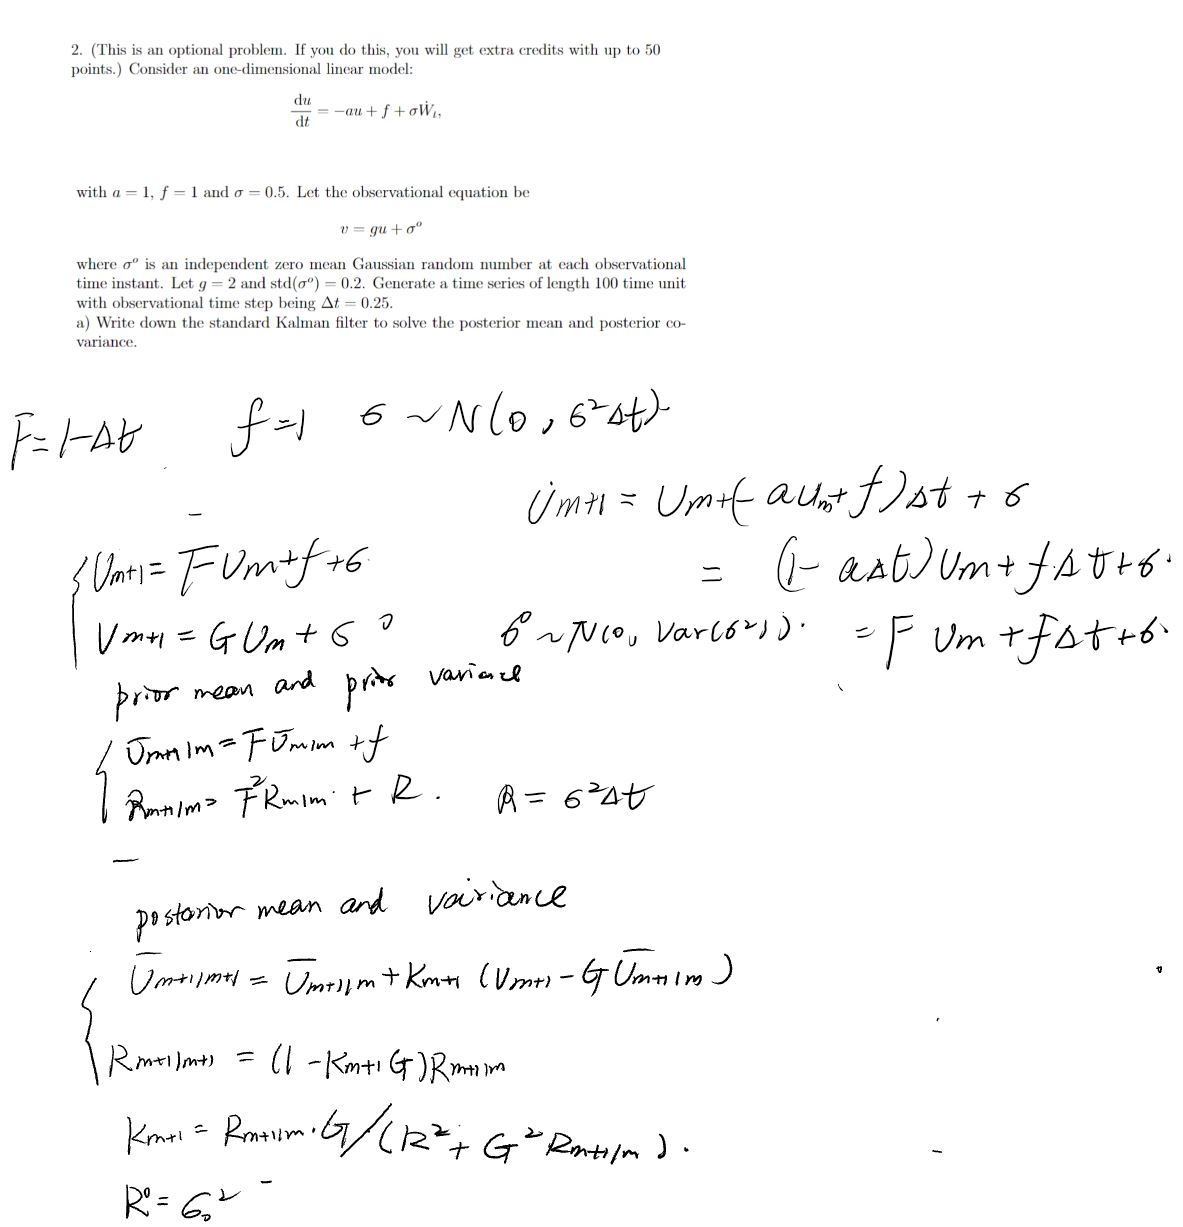

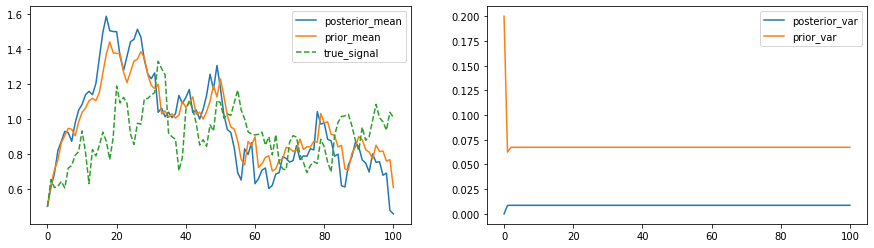

In [ ]:
dt=0.25
F=1-dt
f=1
U=[0.5]
R=[0]
G=2
U0=[0.5]
U1,R1=[0.5],[0.2]
for i in range(100):
  u=U[-1]
  u0=U0[-1]
  r=R[-1]
  np.random.seed()
  sigma=np.random.normal(0,0.2*sqrt(dt))
  u0=F*u0+sigma+f*dt
  u1=F*u+f*dt
  r1=F*r*F+0.25*dt
  v=G*u+np.random.normal(0,0.2)
  k=r1*G/(0.04+G**2*r1)
  u=u1+k*(v-G*u1)
  r=(1-k*G)*r1
  U1.append(u1)
  R1.append(r1)
  U.append(u)
  R.append(r)
  U0.append(u0)

  x=pd.DataFrame()
x['true_signal']=U0
x['posterior_mean']=U
x['prior_mean']=U1

x['posterior_var']=R
x['prior_var']=R1

fig=plt.figure(figsize=(15,4))
ax1,ax2=plt.subplot(1,2,1),plt.subplot(1,2,2)


ax1.plot(x['posterior_mean'],label='posterior_mean')
ax1.plot(x['prior_mean'],label='prior_mean')
ax1.plot(x['true_signal'],label='true_signal',linestyle='--')

ax2.plot(x['posterior_var'],label='posterior_var')
ax2.plot(x['prior_var'],label='prior_var')


ax1.legend()
ax2.legend()
